In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('vehicles.csv', index_col='id', usecols=['id', 'price', 'type', 'year', 'state', 'odometer'])
df

,price,year,odometer,type,state
id,,,,,
7222695916,6000,NaN,NaN,NaN,az
7218891961,11900,NaN,NaN,NaN,ar
7221797935,21000,NaN,NaN,NaN,fl
7222270760,1500,NaN,NaN,NaN,ma
7210384030,4900,NaN,NaN,NaN,nc
...,...,...,...,...,...
7301591192,23590,2019.0,32226.0,sedan,wy
7301591187,30590,2020.0,12029.0,sedan,wy
7301591147,34990,2020.0,4174.0,hatchback,wy


<AxesSubplot:>

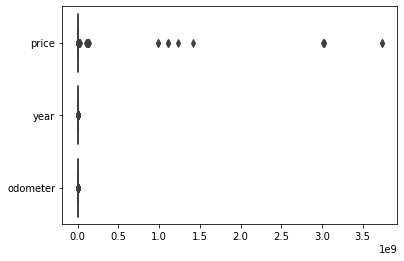

In [3]:
sns.boxplot(data=df, orient="h",whis=1.5)

In [4]:
column = 'price'
q1 = df[column].quantile(0.25)
q3 = df[column].quantile(0.75)
iqr = q3 - q1
upper_boundary = q3 + 1.5 * iqr
lower_boundary = q1 - 1.5 * iqr
df[(df[column] < lower_boundary) | (df[column] > upper_boundary)][column]

id
7316691442        58977
7315849335    987654321
7315259946        98900
7314956487        72900
7314044610        99950
                ...    
7305641060        59900
7305433671        65950
7303328806        65995
7302916705        58995
7302181162        65999
Name: price, Length: 8177, dtype: int64

In [5]:
df_copy = df.copy()
df_copy.at[df[column] < lower_boundary, column] = np.nan
df_copy.at[df[column] < lower_boundary, column] = np.nan
df_copy.at[df[column] > upper_boundary, column] = np.nan
df_copy.at[df[column] > upper_boundary, column] = np.nan

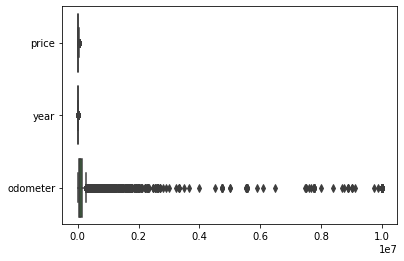

In [6]:
sns.boxplot(data=df_copy, orient='h')
plt.show()

In [7]:
column = 'odometer'
q1 = df_copy[column].quantile(0.25)
q3 = df_copy[column].quantile(0.75)
iqr = q3 - q1
upper_boundary = q3 + 1.5 * iqr
lower_boundary = q1 - 1.5 * iqr
df_copy[(df_copy[column] < lower_boundary) | (df_copy[column] > upper_boundary)][column]

id
7304785580     281000.0
7315849335     999999.0
7314624461     279000.0
7314165149    9999999.0
7313889508     283356.0
                ...    
7310981911     284000.0
7308082716     291988.0
7307059015     287000.0
7306463286     291137.0
7305718110     295000.0
Name: odometer, Length: 4385, dtype: float64

In [8]:
df_copy.at[df[column] < lower_boundary, column] = np.nan
df_copy.at[df[column] < lower_boundary, column] = np.nan
df_copy.at[df[column] > upper_boundary, column] = np.nan
df_copy.at[df[column] > upper_boundary, column] = np.nan

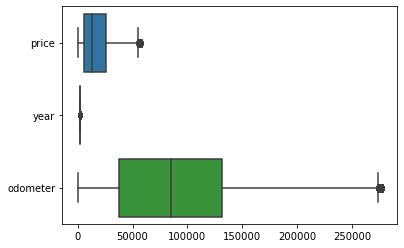

In [9]:
sns.boxplot(data=df_copy, orient='h')
plt.show()

In [10]:
df.isna().sum()

price           0
year         1205
odometer     4400
type        92858
state           0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df['year'] = df['year'].astype('int')
df['odometer'] = df['odometer'].astype('int')

In [14]:
df['state'].unique()

array(['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma',
       'mi', 'mn', 'ms', 'mo', 'mt', 'nc', 'ne', 'nv', 'nj', 'nm', 'ny',
       'nh', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy'], dtype=object)

<AxesSubplot:>

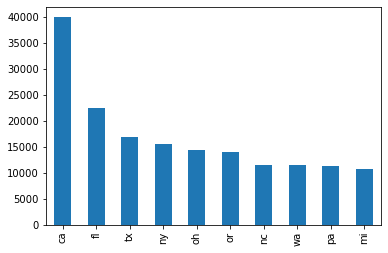

In [15]:
df['state'].value_counts()[:10].plot.bar()

[Text(0.5, 0, 'state'), Text(0, 0.5, 'Average Price of Used Cars')]

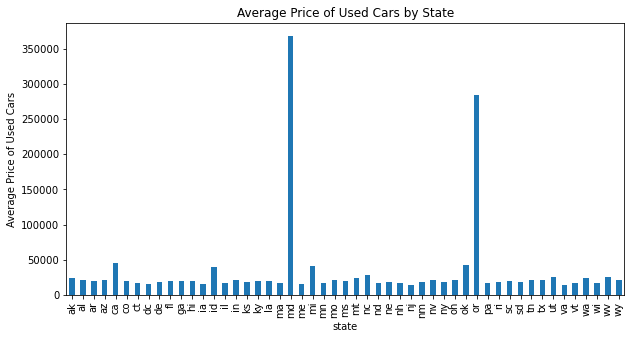

In [19]:
%matplotlib inline
price_per_state = df.groupby('state').mean()['price']
ax = price_per_state.plot(kind='bar',
               title="Average Price of Used Cars by State",
              figsize=(10,5))
ax.set(xlabel='state',
       ylabel='Average Price of Used Cars')